## DEL-02 Programming Excercise - Softmax Regression
### (created by Prof. Dr.-Ing. Christian Bergler & Prof. Dr. Fabian Brunner)

Documentation: **Python-Bibliothek Pandas** - https://pandas.pydata.org/docs/

Documentation: **Numpy** - https://numpy.org/doc/

Documentation: **Sklearn** - https://scikit-learn.org/stable/index.html

Documentation: **Matplotlib** - Documentation: https://matplotlib.org/stable/index.html

Documentation: **Matplotlib** - Graphics Gallery: https://matplotlib.org/2.0.2/gallery.html

Additional Documentation: **Python Tutorial** - https://docs.python.org/3/tutorial/

Additional Documentation: **Matthes Eric, "Python crash course: A hands-on, project-based introduction to programming"**, ISBN: 978-1-59327-603-4, ©2023 no starch press  

### Softmax-Regression

- The model function for the `softmax regression` is made up of the `affine-linear transformation`
\begin{align*}
z_1 &= w_{11}x_1+ w_{21} x_2+\ldots+w_{p1} x_p+b_1~,\\
z_2 &= w_{12}x_1+w_{22} x_2+ \ldots+w_{p2} x_p+b_2~,\\
\vdots & \hspace{4cm}\vdots \\
z_n &= w_{1n}x_1+w_{2n} x_2+\ldots +w_{pn} x_p +b_n
\end{align*}
with $n$ number of (output) neurons and $p$ number of (input) neurons from the previous layer $l-1$.

- Followed by the subsequent application of the `softmax function`
$$
\begin{align*}
\hat{\vec{y}}=\mathrm{softmax}(\vec{z})
\end{align*}
$$
with respect to the (output) feature vector $\vec{z}$: $$\vec{z}=(z_1,\ldots,z_n)^T$$
using:
\begin{align*}
\vec{W}=\left(\begin{array}{rrrr}
w_{11}&w_{12}&\ldots &w_{1n}\\
w_{21}&w_{22}&\ldots&w_{2n}\\
\vdots &\vdots &\ddots&\vdots\\
w_{p1}&w_{p2}&\ldots& w_{pn}
\end{array}\right)\in\mathbb{R}^{p\times n}~,\qquad 
\vec{b}=\left(\begin{array}{c} b_1\\ b_2\\ \vdots \\ b_n\end{array}\right)\in\mathbb{R}^n~
\end{align*}
which represents the vectorized form:
\begin{align*}
\vec{z}&=\vec{W}^T\vec{x}+\vec{b}\\
\hat{\vec{y}}&=\mathrm{softmax}(\vec{z})
\end{align*}

- When vectorizing over a batch $\vec{X}\in\mathbb{R}^{m\times p}$ (where $m$ denotes the number of samples and $p$ the number of features), the representation is as follows
Bei Vektorisierung über ein Batch $\vec{X}\in\mathbb{R}^{m\times p}$ (wobei $m$ die Anzahl der Samples und $p$ die Anzahl der Features bezeichnen) lautet die Darstellung

$$
\begin{align*}
\vec{Z}&=\vec{X}\vec{W}+\vec{b}\\
\hat{\vec{Y}}&=\mathrm{softmax}(\vec{Z})
\end{align*}
$$

### Task DEL-02-1 (Shapes and Weights)

- a) What is the dimension of the matrix $\hat{\vec{Y}}$? How should the rows of the matrix be interpreted?
     - $\hat{\vec{Y}}$ has dimension of ${p\times1}$. Each row represents a probability
- b) Assume that all weights $\vec{W}$ and $\vec{b}$ have the value zero. What result/prediction does the model then provide for any input vector?
     - The model will output equal probabilities for all classes

### Task DEL-02-2 (Numerical Stability)

- a) Consider the following (vectorized) implementation of the `softmax function`:
    - Explain this implementation! In particular, explain why ```keepdims=True``` is needed

In [3]:
import numpy as np
import pandas as pd

def softmax(Z):
    Z_exp = np.exp(Z)
    Z_exp_sum = Z_exp.sum(axis=1, keepdims=True)
    return Z_exp/Z_exp_sum

1. elementwise exponential of input
2. sum over all elements, keepdims ensures that resulting sum has same shape as input
3. calculate class probability

- b) Show that for a given vector $\vec{z}=(z_1,\ldots,z_n)^T$ and any number $\alpha\in\mathbb{R}$:
$$
\begin{align*}
\mathrm{softmax}(\vec{z})=\mathrm{softmax}(\vec{z}-\alpha\cdot (1,\ldots,1)^T)
\end{align*}
$$

- c) What problems can arise in the numerical evaluation of the `softmax function`? How can the property shown in subtask b) be utilised to evaluate the `softmax function` in a numerically stable way?

### Task DEL-02-3 (Model Training with Softmax Regression)

- When training a `softmax regression` model, the unknown weights $\vec{W}$ and $\vec{b}$ are determined by minimizing the `cross-entropy loss function`
$$
L(\vec{W},\vec{b})=-\frac{1}{m}\sum_{i=1}^m\sum_{j=1}^n y^{(i)}_j\cdot \log(\hat{y}^{(i)}_j)~\quad\text{mit}~~\hat{y}^{(i)}_j=f_{\vec{W},\vec{b}}(\vec{x}^{(i)})_j
$$
Here, $y_j^{(i)}$ is the $j$-th component of the $i$-th (vector-valued, obtained by one hot encoding) label and $\hat{y}_j^{(i)}$ is the $j$-th component of the probability distribution predicted by the model for the $i$-th sample of the batch.

- a) In which case does $L(\vec{W},\vec{b})=0$?

- b) Let $L^{(i)}=-\sum_{j=1}^n y_j^{(i)}\log(\hat{y}_j^{(i)})$ be the contribution of the $i$-th samples to the loss function. Using the chain rule, show that 
$$\frac{\partial L^{(i)}}{\partial o_j^{(i)}}= \hat{y}_j^{(i)}-y_j^{(i)}$$
is valid.

- c) Using the result from b), derive expressions for the partial derivatives of $L$ according to the weights:
$$
\begin{align*}
&\frac{\partial L}{\partial w_{ij}}~,\quad i=1,\ldots,p,~ j=1,\ldots,n~,\\
&\frac{\partial L}{\partial b_j}~,\quad ~j=1,\ldots,n~.
\end{align*}
$$

- <b>Result to verify:
  
    </b> If the partial derivatives are summarised in matrices $dW$ and $dB$ (with the same dimensions as $\vec{W}$ and $\vec{b}$), they are obtained in vectorized form by
    $$dW=\frac{1}{m}\vec{X}^T(\hat{\vec{Y}}-\vec{Y})~,\qquad dB=\frac{1}{m}(1,\ldots,1)\cdot(\hat{\vec{Y}}-\vec{Y})$$
    You can use this representation to implement the gradient method in the following task!

### Task DEL-02-4 (Implementation Softmax Regression)

- Complete the following implementation of the MySoftmaxRegression class, which realises the Softmax regression.

In [4]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data 
Y = iris.target

In [5]:
def softmax(Z):
    """
    Vectorized implementation of softmax function
    """
    Z_exp = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    partition = Z_exp.sum(axis=1, keepdims=True)
    return Z_exp / partition

In [11]:
class MySoftmaxRegression:
    
    def __init__(self, lr = 1.0, num_iter = 100):
        self.learning_rate = lr #learning rate
        self.num_iter = num_iter #number of iterations for gradient descent
        self.W = None #weight matrix
        self.b = None #bias vector
        
        
    def net(self, X):
        """
        Model function to predict scores for a batch of samples (for logistic regression, this function was called "predict_proba")
        
        :param X: batch of training data of dimension n_samples x n_features
        :type X: numpy array
        :return: array containing the predicted scores for all samples of the batch X (dimension: n_samples x n_classes)
        :rtype: numpy array
        """
        z = np.dot(X, self.W) + self.b
        exp_z = np.exp(z)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)
    
    def train(self, X, y):
        """
        Model training using gradient descent optimization algorithm
        
        :param X: batch of training data of dimension n_samples x n_features
        :type X: numpy array
        :param y: target values corresponding to records in X 
        :type y: numpy array
        :return: List containing the values of the loss function after each iteration of Gradient descent
        :rtype: list
        """
        n_samples, n_features = X.shape
        n_classes = np.unique(y).shape[0]
        
        # Initialize weights and bias
        self.W = np.zeros((n_features, n_classes))
        self.b = np.zeros((1, n_classes))
        
        loss_history = []
        
        for i in range(self.num_iter):
            # Forward pass
            scores = self.net(X)
            
            # Calculate loss
            correct_scores = scores[np.arange(n_samples), y]
            loss = -np.log(correct_scores).mean()
            loss_history.append(loss)
            
            # Backpropagation
            dscores = scores
            dscores[np.arange(n_samples), y] -= 1
            dscores /= n_samples
            
            dW = np.dot(X.T, dscores)
            db = np.sum(dscores, axis=0, keepdims=True)
            
            # Update weights and biases
            self.W -= self.learning_rate * dW
            self.b -= self.learning_rate * db
        
        return loss_history
    
    def predict(self, X):
        """
        Predict classes based on the largest predicted class probability
        
        :param X: batch of data to be scored
        :type X: numpy array
        :param threshold: decision criterion, where the prediction probability of the model needs to be >= threshold to assign the binary (true) class =1 
        :type threshold: float
        :return: predicted classes for the records in X
        :rtype: numpy array
        """ 
        return np.argmax(self.net(X), axis=1)

- Call the constructor of the class `MySoftmaxRegression` to create an object `my_soft_regressor` and train the algorithm in connection with the training data of the `Iris Dataset` (see above)
- Use a learning rate `lr=`$0.05$ and a number of iteration `num_iter`=$10000$ 

In [12]:
my_soft_reg = MySoftmaxRegression(lr=0.05, num_iter=1000)
losses = my_soft_reg.train(X, Y)

- The `preprocessing` package of the `sklear` module holds a class `StandardScaler`in order to standardize features by substracting the mean and scaling to unit variance via $$z = \frac{x-\mu}{s}$$ with $\mu =$mean, $s=$stdv
- Call the `fit_transform` function of the `sc` object in order to build the standardized data corpus
- Train the model by calling the `train` function of the `my_soft_regressor` ojbect together with the standardized training data and respective labels

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
std_trains = sc.fit_transform(X, Y)

- Using `matplotlib` in order to plot and visualize the temporal development regarding the values of the loss function

Text(0, 0.5, 'Training loss')

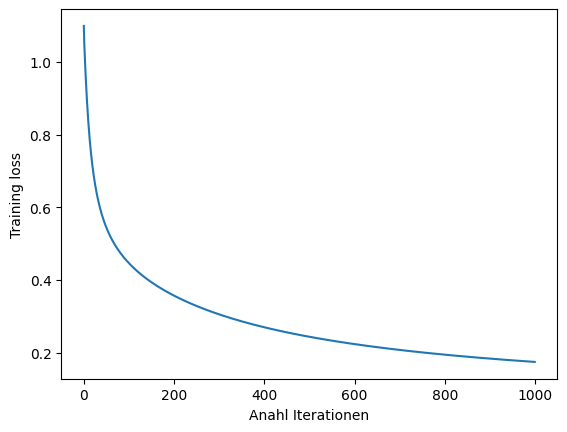

In [14]:
import matplotlib.pyplot as plt

plt.plot(losses)

plt.xlabel('Anahl Iterationen')
plt.ylabel('Training loss')

- Classification of the training dataset (Note: For the sake of simplicity, model validation by splitting the initial data corpus into training, validation, and test data paritions was not performed in this case. The aim of the task was primarily to introduce and present how to design a `softmax regression classifier`. In practice, of course, such partitioning is carried out in advance
- Call the `predict` function of the `my_soft_regressor` object with respect to the standardized training data corpus
- How to handle a threshold operation also in the case of `softmax` regressor?

In [17]:
my_soft_reg.predict(std_trains)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])